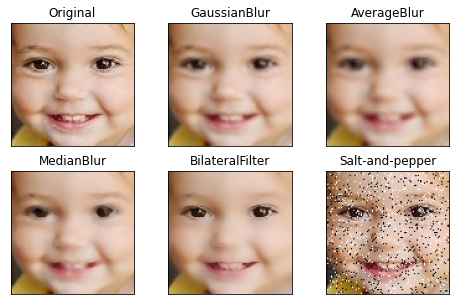

In [1]:
#!/usr/bin/python3
# -*- coding: UTF-8 -*-
import cv2
import random
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('train_01322.jpg')
img = img[:,:,::-1] 

GaussianBlur = cv2.GaussianBlur(img,(5,5),0) # 这里(5, 5)表示高斯矩阵的长与宽都是5，标准差取0时OpenCV会根据高斯矩阵的尺寸计算
AverageBlur = cv2.blur(img,(5,5))  # 平均模糊，就是内核对原图像卷积后求平均
MedianBlur = cv2.medianBlur(img,5) # 中位数模糊（中值模糊）
BilateralFilter = cv2.bilateralFilter(img,10,100,100) #10邻域直径，两个100分别是空间高斯函数标准差，灰度值相似性高斯函数标准差

def sp_noise(image,prob):
  '''
  添加椒盐噪声
  prob:噪声比例 
  '''
  output = np.zeros(image.shape,np.uint8)
  thres = 1 - prob 
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      rdn = random.random()
      if rdn < prob:
        output[i][j] = 0
      elif rdn > thres:
        output[i][j] = 255
      else:
        output[i][j] = image[i][j]
  return output

SaltPepper = sp_noise(img, prob=0.05)

fig = plt.figure(figsize=(8, 5))

plt.subplot(2,3,1),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,2),plt.imshow(GaussianBlur),plt.title('GaussianBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,3),plt.imshow(AverageBlur),plt.title('AverageBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,4),plt.imshow(MedianBlur),plt.title('MedianBlur')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,5),plt.imshow(BilateralFilter),plt.title('BilateralFilter')
plt.xticks([]), plt.yticks([])
plt.subplot(2,3,6),plt.imshow(SaltPepper),plt.title('Salt-and-pepper')
plt.xticks([]), plt.yticks([])
plt.savefig('noise.jpg',transparent=True)
plt.show()